<a href="https://colab.research.google.com/github/andreiamferreira/inferential-statistics/blob/qui-quadrado/Qui_Quadrado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Teste Qui-Quadrado**

## Utilizaremos a biblioteca SciPy para realizar o Teste do Qui-Quadrado em nossa Base de Dados. **


In [ ]:
import pandas as pd
import statistics as st
import numpy as np
from scipy.stats import chi2_contingency

import scipy

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_respostas = pd.read_excel("/content/drive/MyDrive/UFCSPA/NONO SEMESTRE/Estatística Inferencial/respostas.xlsx", sheet_name='Respostasaoform')

df_respostas.head(14)

,Carimbo de data/hora,Idade,Genero,Peso,Curso,Ano,AtivExtracurricular,AtivFisica,Motivo,Vidatvfísica,Atvfísicapratica,Frequenciatvfisica
0,2024-04-05 13:32:31.279,23,Feminino,75.0,Informática Biomédica,5,Sim,Não,Falta de tempo,Sim,NaN,NaN
1,2024-04-05 13:36:57.690,20,Feminino,53.0,Farmácia,3,Sim,Sim,NaN,NaN,Musculação,3.0
2,2024-04-05 13:38:06.018,24,Feminino,56.7,Farmácia,3,Sim,Não,Falta de tempo,Sim,NaN,NaN
3,2024-04-05 13:39:12.581,18,Feminino,64.0,Farmácia,1,Não,Sim,NaN,NaN,"Musculação, Corrida/caminhada",6.0
4,2024-04-05 13:39:30.622,22,Masculino,94.0,Farmácia,6,Sim,Sim,NaN,NaN,"Musculação, Esportes coletivos (ex.: futebol, ...",6.0
5,2024-04-05 13:39:43.838,22,Feminino,60.0,Farmácia,2,Sim,Sim,NaN,NaN,"Musculação, Dança",2.0
6,2024-04-05 13:41:05.693,23,Masculino,80.0,Informática Biomédica,4,Sim,Sim,NaN,NaN,"Musculação, Corrida/caminhada",3.0
7,2024-04-05 13:41:05.858,24,Feminino,70.0,Informática Biomédica,5,Sim,Não,Falta de tempo,Sim,NaN,NaN
8,2024-04-05 13:44:20.366,17,Não-binárie,51.0,Farmácia,1,Não,Não,Falta de tempo,Sim,NaN,NaN
9,2024-04-05 13:44:49.874,20,Feminino,50.0,Farmácia,1,Não,Não,Falta de tempo,Sim,NaN,NaN


## **Apartir de nossa base de dados, criaremos a nossa tabela de Contingência para podermos calcular o nosso Teste Qui-Quadrado**

Nossa primeira pergunta é saber se existe alguma associação entre gênero e a prática de atividade física.
Nosso H0 é que não existe associação entre genero e atividade física e
H1 é que existe associação entre as variáveis.

In [ ]:
!pip install bioinfokit

In [ ]:
from bioinfokit.analys import stat

In [ ]:
# Criando nossa tabela de Contingência (frequencia cruzada)

tabela = pd.crosstab(df_respostas["Genero"], df_respostas["AtivFisica"])

tabela

AtivFisica,Não,Sim
Genero,,
Feminino,22,39
Masculino,6,17
Não-binárie,1,0
Prefiro não dizer,0,1


<Axes: xlabel='Genero', ylabel='Count'>

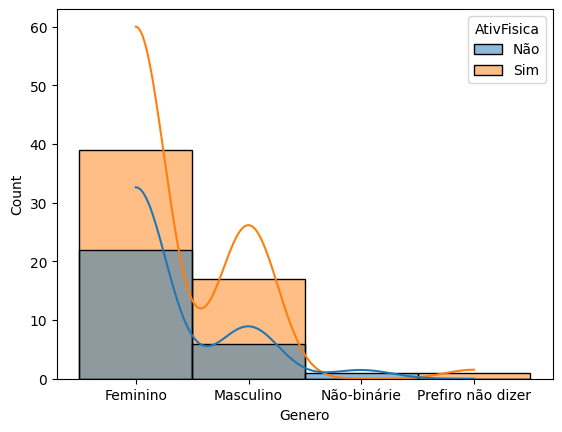

In [ ]:
sns.histplot(data=df_respostas, x="Genero",kde=True, hue="AtivFisica")

In [ ]:
#Aplicando o teste Qui-quadrado
resposta = stat()
resposta.chisq(df = tabela)
print(resposta.summary)


Chi-squared test for independence

Test              Df    Chi-square    P-value
--------------  ----  ------------  ---------
Pearson            3       3.22406   0.358353
Log-likelihood     3       3.77143   0.287227



**Interpretando os resultados:**

Considerando nosso alfa = 0.05 (Nível de significância) e comparando com o P-value de nossa amostra da tabela de contingência, verificamos que alfa > P-value. Sendo assim, as variáveis são dependentes e rejeitamos o H0, ou seja, existe associação entre  gênero e a prática de atividade física.


### Nossa segunda pergunta é se há associação entre a prática de atividade física e o peso.

Neste caso, o H0 é que não existe associação entre peso e a prática de atividade física e H1 é que existe associação entre as variáveis.

In [ ]:
# Criando tabela de contingência entre Peso e Atividade Física
tabela_1 = pd.crosstab(df_respostas["Peso"], df_respostas["AtivFisica"])

tabela_1

<Axes: xlabel='Peso', ylabel='Count'>

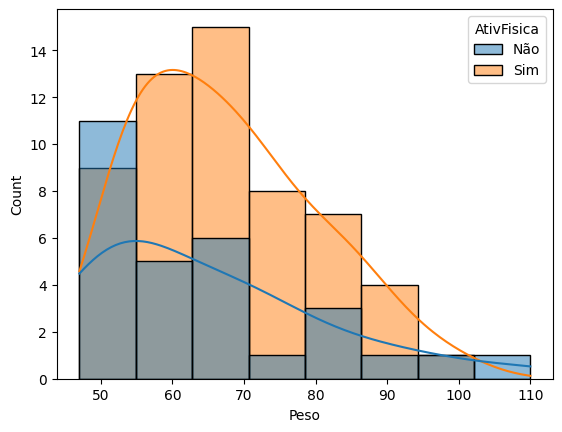

In [ ]:
sns.histplot(data=df_respostas, x="Peso",kde=True, hue="AtivFisica")

In [ ]:
#Aplicando o teste Qui-quadrado
resposta_1 = stat()
resposta_1.chisq(df = tabela_1)
print(resposta_1.summary)


Chi-squared test for independence

Test              Df    Chi-square    P-value
--------------  ----  ------------  ---------
Pearson           44       51.1112   0.214496
Log-likelihood    44       64.7835   0.022312



**Interpretando os resultados:**

Considerando nosso alfa = 0.05 (Nível de significância) e comparando com o P-value de nossa amostra da tabela_1 de contingência, verificamos novamente que alfa > P-value. Sendo assim, as variáveis são dependentes e rejeitamos o H0, ou seja, há associação entre peso a prática de atividade física.